In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [4]:
OKCdf = gdf[gdf.Tm == 'OKC']
LACdf = gdf[gdf.Tm == 'LAC']


In [5]:
OKCdf.Date = OKCdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
OKCdf = OKCdf[(OKCdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (OKCdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

LACdf.Date = LACdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
LACdf = LACdf[(LACdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (LACdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

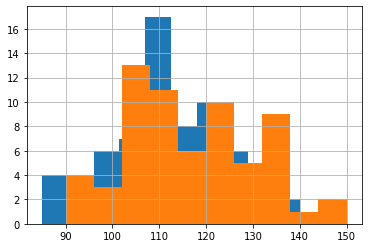

In [6]:
OKCdf.TeamPTS.hist()
LACdf.TeamPTS.hist()

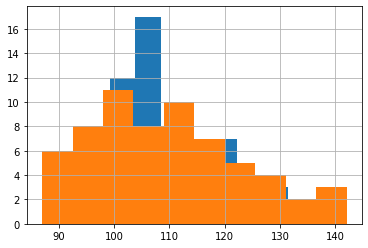

In [7]:
OKCdf.OpponentPTS.hist()
LACdf.OpponentPTS.hist()

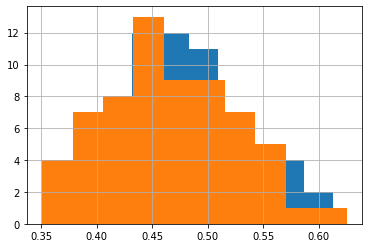

In [8]:
OKCdf.TeamFGP.hist()
LACdf.TeamFGP.hist()

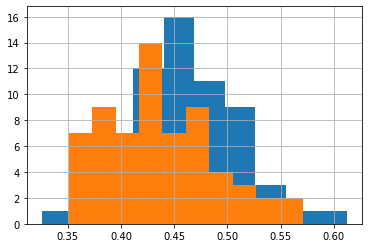

In [9]:
OKCdf.OpponentFGP.hist()
LACdf.OpponentFGP.hist()

In [10]:
OKCmeanpts = OKCdf.TeamPTS.mean()
LACmeanpts = LACdf.TeamPTS.mean()
OKCfgp = OKCdf.TeamFGP.mean()
LACfgp = LACdf.TeamFGP.mean()
OKCsdpts = OKCdf.TeamPTS.std()
LACsdpts = LACdf.TeamPTS.std()

OKCmeaLACp = OKCdf.OpponentPTS.mean()
LACmeaLACp = LACdf.OpponentPTS.mean()
OKCfgpopp = OKCdf.OpponentFGP.mean()
LACfgpopp = LACdf.OpponentFGP.mean()
OKCsdopp = OKCdf.OpponentPTS.std()
LACsdopp = LACdf.OpponentPTS.std()

print("OKC Mean ", OKCmeanpts)
print("OKC FG% ", OKCfgp)
print("OKC Points Standard Deviation ", OKCsdpts)
print("LAC Points Mean ", LACmeanpts)
print("LAC FG% ", LACfgp)
print("LAC Points Standard Deviation ", LACsdpts)

print("OKC OppPoints Mean ", OKCmeaLACp)
print("OKC OppFG% Mean ", OKCfgpopp)
print("OKC OppPoints SD ", OKCsdopp)
print("LAC OppPoints Mean ", LACmeaLACp)
print("LAC OppFG% Mean ", LACfgpopp)
print("LAC OppPoints SD ", LACsdopp)

OKC Mean  110.765625
OKC FG%  0.4743125
OKC Points Standard Deviation  11.978475652947415
LAC Points Mean  116.1875
LAC FG%  0.46528125000000015
LAC Points Standard Deviation  14.054175225527867
OKC OppPoints Mean  108.3125
OKC OppFG% Mean  0.45717187500000017
OKC OppPoints SD  10.555785294074676
LAC OppPoints Mean  109.671875
LAC OppFG% Mean  0.4372500000000002
LAC OppPoints SD  13.727570089260354


In [11]:
def gameSim():
    OKCScore = (rnd.gauss(OKCmeanpts,OKCsdpts)+ rnd.gauss(LACmeaLACp,LACsdopp))/2
    LACScore = (rnd.gauss(LACmeanpts,LACsdpts)+ rnd.gauss(LACmeaLACp,LACsdopp))/2
    if int(round(OKCScore)) > int(round(LACScore)):
        return 1
    elif int(round(OKCScore)) < int(round(LACScore)):
        return -1
    else: return 0

In [12]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('OKC Win ', team1win/(team1win+team2win),'%')
    print('LAC Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [13]:
gAmesSim(10000)

OKC Win  0.42017326732673266 %
LAC Win  0.5798267326732673 %


[-1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
